In [64]:
# Import key libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as r

In [65]:
# List the ticker symbols for the stocks of interest
lst=['BMO.TO', 'BNS.TO', 'CM.TO', 'NA.TO','RY.TO', 'TD.TO', 'ZEB.TO','ZWB.TO']
# Define a dataframe to hold all data
dfAllStocks=pd.DataFrame()
# Determine the start and end dates
start_date = '2016-08-01'
end_date = '2019-07-31'

# Gathers stock data from listed tickers and combines them into a dataframe
for ticker in lst:
    df= yf.download(ticker, start= start_date, end= end_date)
    # Remove to '.TO' suffix from Canadian stocks
    tic= ticker.replace('.TO','')
    df['Ticker']=tic
    # Drop unwanted columns
    df.drop(columns= ["Open", "High", "Low", "Close", "Volume", "Ticker"], inplace= True)
    # Change the datetime to a date
    df.index = df.index.date
    # Store each set of ticker data in a dataframe
    dfAllStocks=pd.concat([dfAllStocks, df], axis= 1)
 
# Rename the coloumns to the ticker symbols in the list
dfAllStocks.columns = lst
# Drop the N/As
dfAllStocks.dropna(inplace=True)
# Display dataframe of stocks   
display(dfAllStocks)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BMO.TO,BNS.TO,CM.TO,NA.TO,RY.TO,TD.TO,ZEB.TO,ZWB.TO
2016-08-02,64.920090,48.621647,35.759644,34.783413,62.392986,43.958847,18.437222,11.674097
2016-08-03,64.723801,48.584625,35.924675,34.838516,62.512001,43.943195,18.453226,11.681194
2016-08-04,64.456871,48.503185,35.994350,34.751915,62.519920,43.896259,18.413208,11.667001
2016-08-05,65.045685,49.125107,36.434422,35.058975,63.043560,44.498653,18.605270,11.773448
2016-08-08,65.548180,49.362034,36.599442,35.673077,63.368881,44.623821,18.757309,11.858614
...,...,...,...,...,...,...,...,...
2019-07-24,86.878342,59.187149,43.932129,57.061749,93.263298,67.621872,25.421848,15.217306
2019-07-25,86.913170,59.557659,43.902523,56.945862,92.783821,67.360207,25.386549,15.200807
2019-07-26,87.043755,59.397663,43.817936,57.195457,93.023560,67.368935,25.404202,15.217306
2019-07-29,87.270119,59.616592,43.779869,57.088490,93.023560,67.499771,25.421900,15.229733


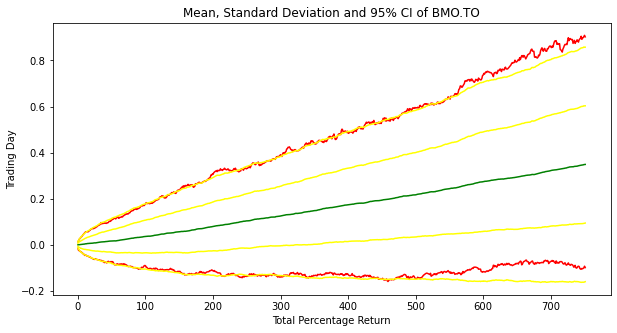

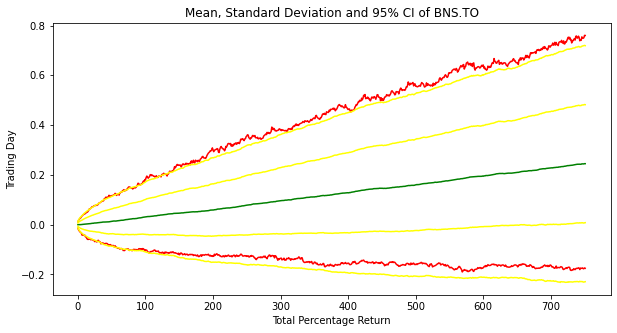

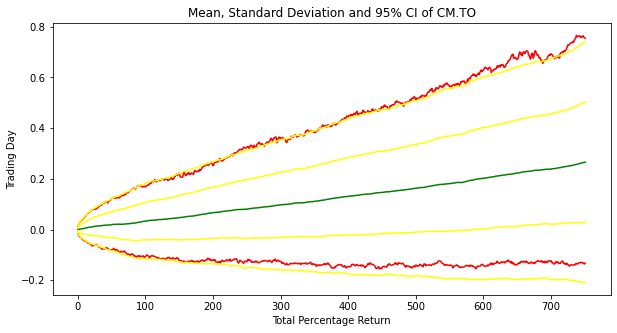

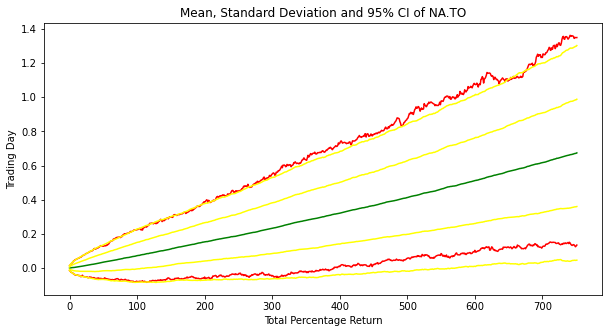

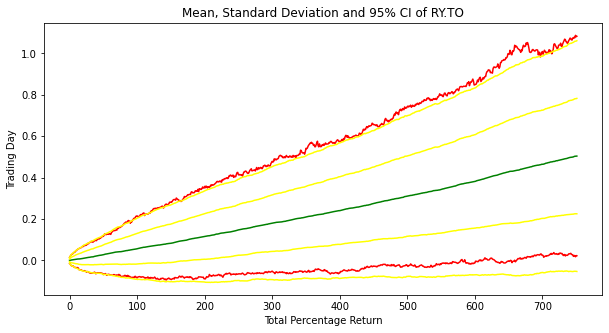

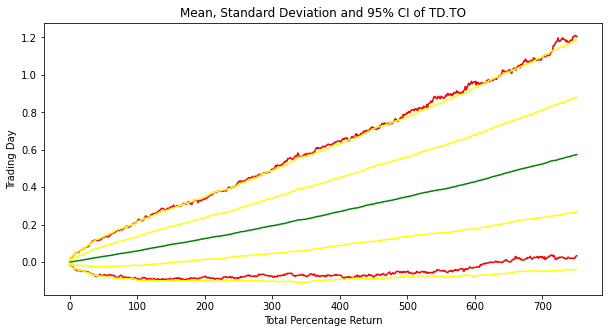

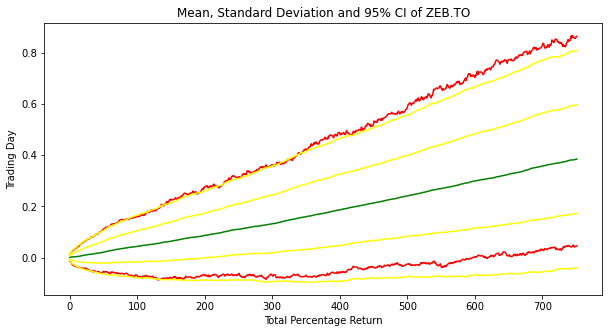

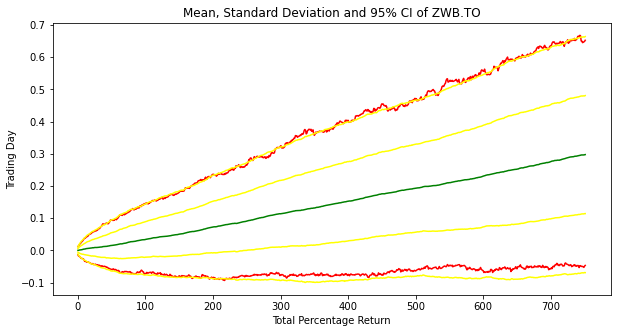

,mean,std,min,25%,50%,75%,max,95% CI Lower,95% CI Upper
BMO.TO,1.348717,0.254353,0.719676,1.172495,1.327734,1.500493,2.234131,0.901085,1.902090
BNS.TO,1.244866,0.237121,0.688264,1.087507,1.222725,1.389779,2.196437,0.824564,1.759985
CM.TO,1.265169,0.236710,0.617304,1.101222,1.240649,1.411469,2.106339,0.867984,1.754173
NA.TO,1.674474,0.314052,0.915046,1.467367,1.636283,1.862629,3.136784,1.134733,2.349453
RY.TO,1.504121,0.278818,0.819722,1.310192,1.471119,1.685846,2.479368,1.022700,2.082828
TD.TO,1.574274,0.306164,0.769180,1.351926,1.556185,1.783623,2.564808,1.033485,2.204718
ZEB.TO,1.384471,0.212268,0.932861,1.229102,1.363020,1.516756,2.205310,1.045437,1.864178
ZWB.TO,1.297632,0.183287,0.822798,1.171756,1.293292,1.426672,1.910457,0.953434,1.652652


In [66]:
# Create dataframe to hold Monte Carlo data
dfTotalSummary=pd.DataFrame()

for ticker in lst:
    # Create temporary dataframe
    dfTemp=dfAllStocks[[ticker]]
    # Store percent change data for a given stock
    dfTemp=dfTemp[[ticker]].pct_change().dropna()
    # Create list of percentage returns
    lst=dfTemp[ticker].to_list()

    # Choose the number of simulations
    num_simulations=500
    # The number of datapoints is the number of rows
    num_datapoints= len(dfAllStocks.index)
    # Create empty dictionary to store data
    dictSim={}

    # Fill the dictionary with lists from each simulation
    for i in range(num_simulations):
        # Create an empty list for each simulation
        dictSim[i]=[]
    
        for j in range(num_datapoints):
            # Append each new list with a random historical pct return
            dictSim[i].append(r.choice(lst))

    # Convert the dictionary to a dataframe
    dfSim=pd.DataFrame(dictSim)
    # Determine the cumlative return
    dfCumReturns=(1 + dfSim).cumprod() - 1
    
    # Display the Monte Carlo simulations -  COMMENTED OUT FOR PERFORMANCE
    '''fig, ax = plt.subplots(1,1)
    ax.plot(dfCumReturns)
    ax.set_title(f"Monte Carlo Simulation of {ticker}")
    ax.set_xlabel("Trading Days")
    ax.set_ylabel("Total Percentage Return")'''

    # Convert the last row of the cumulative total returns to a list
    LastCumReturn = dfCumReturns.iloc[-1, :].tolist()
    # Add 1 to each value to get the total return
    TotalReturn = [pctReturn + 1 for pctReturn in LastCumReturn]
    # Convert the list to a dataframe
    dfLastCum = pd.DataFrame(TotalReturn)

    # Create a list of percentiles of interest
    perc = [0.025, 0.25, 0.5, 0.75, 0.975]
    # Describe the cumulative return data
    dfFullSummary= dfCumReturns.T.describe(percentiles= perc, include= float)
    # Convert the summary to a dictionary and select the last element
    FullSummary = dfFullSummary.to_dict()
    LastSummary =FullSummary[len(dfAllStocks.index)- 1]

    # Create dataframe to hold mean and two standard deviations away from the mean and 95% CI - COMMENTED OUT FOR PERFORMANCE
    dfMC_StdMean = dfFullSummary.loc[['mean', 'std', '2.5%', '97.5%']]
    dfMC_StdMean.loc['+1std'] = dfMC_StdMean.loc['mean'] + dfMC_StdMean.loc['std']
    dfMC_StdMean.loc['+2std'] = dfMC_StdMean.loc['mean'] + 2 * dfMC_StdMean.loc['std']
    dfMC_StdMean.loc['-1std'] = dfMC_StdMean.loc['mean'] - dfMC_StdMean.loc['std']
    dfMC_StdMean.loc['-2std'] = dfMC_StdMean.loc['mean'] - 2 * dfMC_StdMean.loc['std']
    
    # Display average, double standard deviation and 95% CI of the Monte Carlo
    fig1 = plt.figure(figsize=(10, 5))
    plt.plot(dfMC_StdMean.loc['mean'], color= "green")
    plt.plot(dfMC_StdMean.loc['2.5%'], color= "red")
    plt.plot(dfMC_StdMean.loc['97.5%'], color= "red")
    plt.plot(dfMC_StdMean.loc['+1std'], color= "yellow")
    plt.plot(dfMC_StdMean.loc['+2std'], color= "yellow")
    plt.plot(dfMC_StdMean.loc['-1std'], color= "yellow")
    plt.plot(dfMC_StdMean.loc['-2std'], color= "yellow")
    plt.title(f"Mean, Standard Deviation and 95% CI of {ticker}")
    plt.xlabel("Total Percentage Return")
    plt.ylabel("Trading Day")

    plt.show()

    # Increment all value by 1 except the count and standard deviation
    for key, value in LastSummary.items():
        if ( (key != 'std' ) and ( key != 'count') ):
            LastSummary[key] = LastSummary[key] + 1

    # Convert the data back into a dataframe
    dfFullSummary = pd.DataFrame(LastSummary, index= [ticker])
    # Rename the columns to show 95% confidence interval
    dfFullSummary.rename(columns= {'2.5%': '95% CI Lower', '97.5%': '95% CI Upper'}, inplace= True)
    # Reorder the columns for clarity
    dfFullSummary= dfFullSummary[['count', 'mean', 'std', 'min', '25%' ,'50%', '75%', 'max', '95% CI Lower', '95% CI Upper']]
    dfFullSummary= dfFullSummary.drop('count', axis = 1)
    
    dfTotalSummary = pd.concat([dfTotalSummary, dfFullSummary], axis= 0)
    
    # Get the 95% confidence interval
    CI_95low= LastSummary['2.5%']
    CI_95up= LastSummary['97.5%']

    # Get the mean and standard deviation
    mean= LastSummary['mean']
    stdDev= LastSummary['std']
    
    # Display histogram of the data - COMMENTED OUT FOR PERFORMANCE
    '''"fig, ax = plt.subplots(1,1)
    ax.hist(dfLastCum)
    ax.set_title(f"Distribution of Cumulative Returns of {ticker}")
    ax.set_xlabel("Total Percentage Return")
    ax.set_ylabel("Occurance")
    ax.vlines(CI_95low,0, 125,"red","solid")
    ax.vlines(CI_95up, 0, 125,"red","solid")
    ax.vlines(mean, 0, 125,"green","solid")
    ax.vlines(mean-stdDev, 0, 125,"yellow","solid")
    ax.vlines(mean+stdDev, 0, 125,"yellow","solid")
    ax.vlines(mean-2*stdDev, 0, 125,"yellow","solid")
    ax.vlines(mean+ 2*stdDev, 0, 125,"yellow","solid")'''

plt.show()

# Display dataframe
display(dfTotalSummary)